In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sbcbinaryformat import Streamer, Writer

ana_path = "../LAr10Ana/"
sys.path.insert(0, ana_path)

from GetEvent import GetEvent

%matplotlib inline

In [ ]:
run = "/exp/e961/data/SBC-25-daqdata/20251120_12.tar"
event = 0
data = GetEvent(run, event, "slow_daq", "run_info", "event_info", strictMode=False, lazy_load_scintillation=False)
slow = data["slow_daq"]
slow.keys()

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


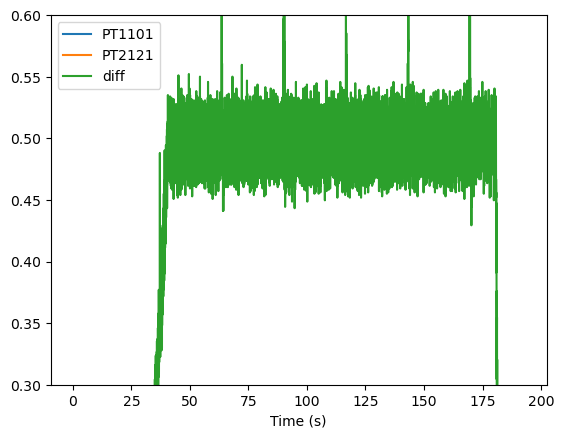

In [21]:
plt.plot(slow["time_ms"]/1000, slow["PT1101"], label="PT1101")
plt.plot(slow["time_ms"]/1000, slow["PT2121"], label="PT2121")
plt.plot(slow["time_ms"]/1000, slow["PT1101"]-slow["PT2121"], label="diff")
# plt.plot(slow["time_ms"], slow["SERVO3321_OUT"], label="SERVO_OUT")
# plt.plot(slow["time_ms"], slow["SERVO3321_IN"], label="SERVO_IN")
plt.xlabel("Time (s)")
plt.ylim(0.3, 0.6)
plt.legend()
plt.show()

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(slow["time_ms"]/1000, slow["PT1101"], label="PT1101")
ax1.plot(slow["time_ms"]/1000, slow["PT2121"], label="PT2121")
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Pressure (bara)")
# ax1.set_ylim(2, 6)

ax2=ax1.twinx()
ax2.plot(slow["time_ms"]/1000, slow["PT1101"]-slow["PT2121"], color="g", label="diff", alpha=0.5)
# ax2.set_ylim(0.3, 0.6)
ax2.set_ylabel("Pressure (bara)", color="g")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc=0)